데이터셋 다운로드 링크
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [8]:
import numpy as np # 선형대수 등 숫자와 관련된 행렬 연산시 사용
import pandas as pd # csv load
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화

In [56]:
# 트레이닝, 테스트 데이터 분리때 사용
from sklearn.model_selection import train_test_split
# cross valdiation 구현할 때 사용
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict #predict:예측하다
# 메트릭을 확인하기 위해 사용
from sklearn import metrics

'''
<머신러닝 메소드>
'''
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

diagnosis
1)M-malignant(악성)
2)B-benign(양성)

In [15]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
# 필요없는 컬럼 지우기
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)

# diagnosis컬럼의 값 변경하기
'''
Benige: 양성(0)
Malignant: 악성(1)
'''
data['diagnosis'] = data['diagnosis'].map({'B':0, 'M':1})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
# 데이터프레임 개요
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/Users/bang-eunho/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

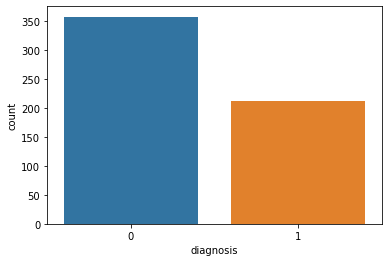

In [19]:
# diagnosis 컬럼의 분포 확인
sns.countplot(data['diagnosis'])

'''
만약에 데이터 균형 차이가 너무 많이 난다면, 비슷하게 맞춰줄 필요가 있다.
(지금은 걍 쓰자)
<방법>
1. 큰 쪽을 자르거나
2. 작은 쪽을 복제하거나(비슷하게 데이터를 생성하는 알고리즘 있음)
'''

In [31]:
# test_size=0.2(20%) 라는 것은 train set이 0.8(80%)
# random_state : 수행할 때마다 동일한 값 얻기 위한 옵션
train, test = train_test_split(data, test_size=0.2, random_state=2019)

# <<Train 데이터셋>>
# x를 '어떤'모델에 넣어서 y 도출... 그러니 diagnosis 컬럼은 x에 있으면 안 됨(y에만 있어야 됨)
x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

# <<Test 데이터셋>>
x_test = train.drop(['diagnosis'], axis=1)
y_test = train.diagnosis

print(len(train), len(test))

455 114


455개 데이터를 학습 시켜서 114개 데이터로 이 모델 성능을 검증할 것이다.

# SVM(support vector muchine)

In [35]:
model = svm.SVC(gamma='scale')

# model.fit(): 주어진 모델로 학습
model.fit(x_train, y_train)

# <<모델 검증>>
# model.predict() : 주어진 x값에 대해서 y를 예측한다.
y_pred = model.predict(x_test)

# accuracy_score() : 정확도를 측정한다. #accuracy:정확성
# 예측값과 정답값을 비교해서 그것의 정확도를 구함
# 예측값: y_pred, 정답값: y_test
print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100)) #  .2f : 자릿수 제한
'''
결과 값은 즉, 이 모델이 양성인지, 악성인지 구분하는 능력치를 나타냄
'''

SVM: 92.31


----
# DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("DecisionTreeClassifier: %.2f" %( metrics.accuracy_score(y_pred, y_test)*100))

DecisionTreeClassifier: 100.00


-------
# KNeighborsClassfier
# (K-Nearest Neighbors(KNN)): K-최근접 이웃

In [39]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % ((metrics.accuracy_score(y_pred, y_test)*100)))

KNeighborsClassifier: 95.16


------
# LogisticRegression(로지스틱 회귀)

In [41]:
'''
solver, max_iter 해당 파라미터는 가장 높은 정확도를 내는 걸로 지정하면 됨
solver: 최적화 알고리즘 결정(solver:해결사)
    - "lbfgs" 자체가 알고리즘
max_iter: 반복 횟수 제한(solver가 수렴하게 만드는 최대 반복 횟수 값)'''
model = LogisticRegression(solver='lbfgs', max_iter=2000)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("LogisticRegression: %.2f" % (metrics.accuracy_score(y_pred, y_test)*100))

LogisticRegression: 96.04


----
# RandomForestClassifier

In [42]:
'''
n_estimators
- 결정트리의 갯수를 지정
- Default = 10
- 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음
'''
model = RandomForestClassifier(n_estimators=100)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("RandomForestClassifier: %.2f" % (metrics.accuracy_score(y_pred, y_test)*100))

RandomForestClassifier: 100.00


--------
--------

# Compute Feature Importances

In [ ]:
'''
각각 feature 중요도 뽑기
더 편하게 사용하는 방법 알기
'''

In [48]:
# 중요한 feature 계산
# model.feature_importances_: 모델을 예측하는 데 있어 어떤 파라미터가 중요한지 계산한다
features = pd.Series(
    model.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False) # asending:오름차순

'''
feature_importances_라는 변수를 가지고 오면 []리스트 형식으로 인덱스가 저장되어 있는데
이것과 x_train 컬럼과 매칭 시켜서 판다스의 Series를 사용해서 정리할 것이다.
asending=False 내림차순으로 정리

'''

print(features)

concave points_worst       0.183876
perimeter_worst            0.123797
concave points_mean        0.102787
radius_worst               0.096512
area_worst                 0.075007
perimeter_mean             0.052488
area_mean                  0.050496
radius_mean                0.044915
perimeter_se               0.036526
concavity_worst            0.033517
area_se                    0.032867
concavity_mean             0.030102
texture_worst              0.015581
texture_mean               0.012716
radius_se                  0.012422
smoothness_worst           0.011711
compactness_mean           0.011020
compactness_worst          0.010898
symmetry_worst             0.009677
concave points_se          0.007884
smoothness_mean            0.007852
concavity_se               0.007071
fractal_dimension_worst    0.006058
texture_se                 0.004060
fractal_dimension_mean     0.004055
symmetry_se                0.003873
fractal_dimension_se       0.003824
compactness_se             0

### 상위 5개 feature 가지고 모델 생성

In [50]:
top_5_features = features.keys()[:5]
print(top_5_features)

Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'area_worst'],
      dtype='object')


# SVM(Top5)

In [54]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top_5_features], y_train)
y_pred = model.predict(x_test[top_5_features])
print("SVM: %.2f" % (metrics.accuracy_score(y_pred, y_test)*100))

SVM: 92.31


---
# Cross Validation(Tedious)
# K-Fold Cross Validation: K겹 교차검증
Validation: 검증
Fold: 겹
### 데이터셋이 적을 때 쓰면 효과적인 방법
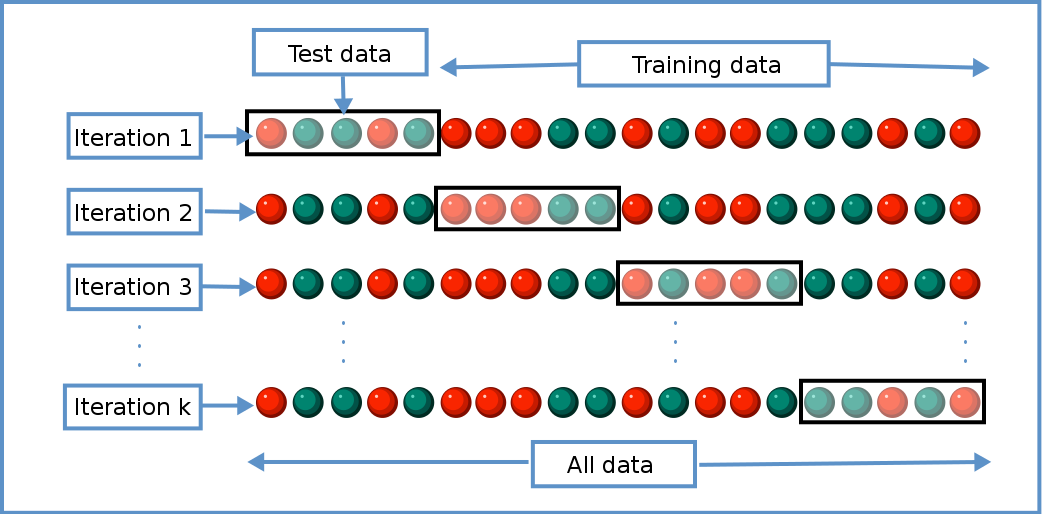

In [66]:
model = svm.SVC(gamma='scale')

# n_splits: 몇 번 반복할 것인지 | 위 그림에서 iteration 1~k 이 부분에 속함
cv = KFold(n_splits=5)

accs = []

# train_index: 트레인 데이터셋의 인덱스 저장되어 있음 | test_index: 테스트 데이터셋의 인덱스 저장되어 있음
# train_index -> [114 115 116 117 ....]     | test_index -> [0 1 2 ... 113]
for train_index, test_index in cv.split(data[top_5_features]):
    x_train = data.iloc[train_index][top_5_features]
    y_train = data.iloc[train_index].diagnosis
    
    x_test = data.iloc[test_index][top_5_features]
    y_test = data.iloc[test_index].diagnosis
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accs.append(metrics.accuracy_score(y_pred, y_test))
print(accs)

[0.7807017543859649, 0.8947368421052632, 0.9736842105263158, 0.9298245614035088, 0.9380530973451328]


# Cross Validation (Simple)

In [67]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5)

# cross_val_score(): Cross Validation을 적용하여 학습한 후 모델의 점수를 출력한다.
# cross_val_score(모델, x데이터, y데이터, 위에서 정의한 KFold)
accs = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)

print(accs)

[0.78070175 0.89473684 0.97368421 0.92982456 0.9380531 ]


------
-------


# Test All Models

위에서 테스트 했던 모델 전부를 한 번에 Cross Validation을 할 것이다.

In [84]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)
    
    print("%s: %.2f%%" % (name, np.mean(scores)*100)) # %% 두개 쓴 이유는 프린트에서 '%'가 나오게 하기 위함

SVM: 90.34%
DecisionTreeClassifier: 91.74%
KNeighborsClassifier: 88.40%
LogisticRegression: 90.69%
RandomForestClassifier: 93.50%


---

In [85]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler(): 데이터셋이 0~1사이 값으로 스케일이 됨
scaler = MinMaxScaler(feature_range=(0,1)) # 0~1 범위 지정
# 위에서 정의한 범위로 데이터셋 적용
scaled_data = scaler.fit_transform(data[top_5_features])

models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier':RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)
    
    print("%s: %.2f%%" % (name, np.mean(scores)*100))

SVM: 90.34%
DecisionTreeClassifier: 91.38%
KNeighborsClassifier: 88.40%
LogisticRegression: 90.69%
RandomForestClassifier: 93.68%


In [86]:
# normalization: 표준화

'''
<normalization 안 한 것>

SVM: 90.34%
DecisionTreeClassifier: 91.74%
KNeighborsClassifier: 88.40%
LogisticRegression: 90.69%
RandomForestClassifier: 93.50%
'''



'''
<normalization 한 것>

SVM: 90.34%
DecisionTreeClassifier: 91.38%
KNeighborsClassifier: 88.40%
LogisticRegression: 90.69%
RandomForestClassifier: 93.68%
'''

'\n<normalization 한 것>\n\nSVM: 90.34%\nDecisionTreeClassifier: 91.38%\nKNeighborsClassifier: 88.40%\nLogisticRegression: 90.69%\nRandomForestClassifier: 93.68%\n'